# Table Detector training

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-ocr-workshop/blob/master/jupyter/SparkOCRTableDetectorTraining.ipynb)

## Set license and AWS keys

Need to specify:
- secret
- license
- aws credentials

### Option #1 - define in this cell

In [1]:
import os

secret = ""
version = secret.split("-")[0]

os.environ['JSL_OCR_LICENSE'] = ""
os.environ["AWS_ACCESS_KEY_ID"] = ""
os.environ["AWS_SECRET_ACCESS_KEY"] = ""

### Option #2 - provide spark_ocr.json file

In [2]:
#import json, os
#import sys

#if 'google.colab' in sys.modules:
#    from google.colab import files

#    if 'spark_ocr.json' not in os.listdir():
#      license_keys = files.upload()
#      os.rename(list(license_keys.keys())[0], 'spark_ocr.json')

#with open('spark_ocr.json') as f:
#    license_keys = json.load(f)

## Defining license key-value pairs as local variables
#locals().update(license_keys)

## Install Spark-OCR

It is needed only in case of colab. For other environment you should prepare environment appropriately.

## Download demo datasets

Here we downloaded demo set. This set is part of mmdetection_object_detection_demo github project.

In [3]:
#!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
#!tar -xvf VOCtest_06-Nov-2007.tar

## Start Spark session with Spark OCR

In [4]:
from sparkocr import start
from pyspark import SparkConf

spark_ocr_jar_path = "../../spark-ocr/target/scala-2.12/"
spark = start(jar_path = spark_ocr_jar_path)

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
spark.conf.set("spark.jsl.settings.pretrained.s3_bucket", "dev.johnsnowlabs.com")

spark

Spark version: 3.2.2
Spark NLP version: 4.1.0
Spark NLP for Healthcare version: 4.1.0
Spark OCR version: 4.1.0



## Load dataset

In [5]:
from sparkocr.transformers.readers.dataset_voc2007_reader import DatasetVOC2007Reader

df = DatasetVOC2007Reader().read(spark, "VOCdevkit/VOC2007/")
df

path,modificationTime,length,content,filename,annotation
file:/home/alexan...,2007-01-09 20:11:28,207941,[FF D8 FF E0 00 1...,005495.jpg,"[{ENTITY, 0, 0, b..."
file:/home/alexan...,2007-01-09 17:01:52,196383,[FF D8 FF E0 00 1...,000497.jpg,"[{ENTITY, 0, 0, m..."
file:/home/alexan...,2007-01-09 17:01:30,194871,[FF D8 FF E0 00 1...,004358.jpg,"[{ENTITY, 0, 0, b..."
file:/home/alexan...,2007-01-09 14:39:50,187809,[FF D8 FF E0 00 1...,004979.jpg,"[{ENTITY, 0, 0, d..."
file:/home/alexan...,2007-01-09 20:09:38,180992,[FF D8 FF E0 00 1...,000614.jpg,"[{ENTITY, 0, 0, b..."
file:/home/alexan...,2007-01-09 22:01:44,180575,[FF D8 FF E0 00 1...,004580.jpg,"[{ENTITY, 0, 0, p..."
file:/home/alexan...,2007-01-09 21:27:42,174710,[FF D8 FF E0 00 1...,002959.jpg,"[{ENTITY, 0, 0, c..."
file:/home/alexan...,2007-01-09 13:41:58,173869,[FF D8 FF E0 00 1...,000057.jpg,"[{ENTITY, 0, 0, b..."
file:/home/alexan...,2007-01-09 21:18:16,173585,[FF D8 FF E0 00 1...,005216.jpg,"[{ENTITY, 0, 0, b..."
file:/home/alexan...,2007-01-09 21:08:48,172030,[FF D8 FF E0 00 1...,001313.jpg,"[{ENTITY, 0, 0, c..."


## Show annotations


    Image #0:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/VOCdevkit/VOC2007/JPEGImages/005495.jpg
    Resolution: 0 dpi
    Width: 476 px
    Height: 500 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


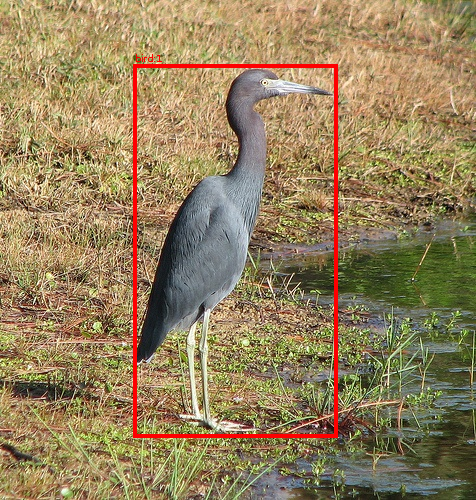


    Image #1:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/VOCdevkit/VOC2007/JPEGImages/000497.jpg
    Resolution: 0 dpi
    Width: 500 px
    Height: 500 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


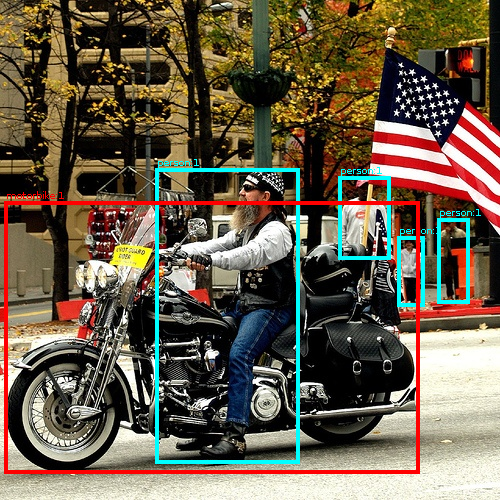


    Image #2:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/VOCdevkit/VOC2007/JPEGImages/004358.jpg
    Resolution: 0 dpi
    Width: 444 px
    Height: 500 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


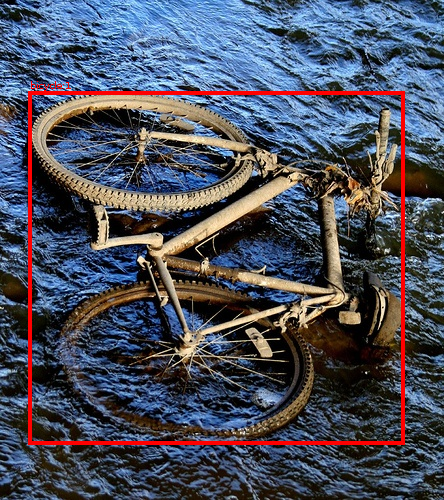


    Image #3:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/VOCdevkit/VOC2007/JPEGImages/004979.jpg
    Resolution: 0 dpi
    Width: 500 px
    Height: 400 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


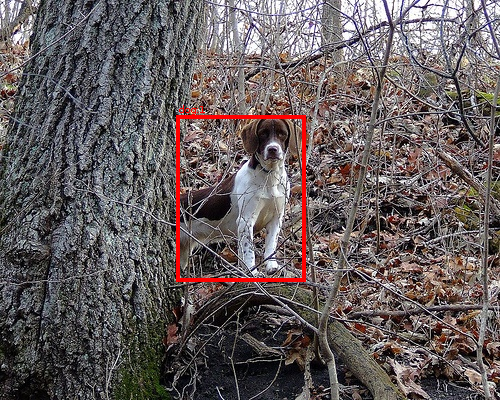


    Image #4:
    Origin: file:/home/alexander_jsl/Workspace/spark-ocr-workshop/jupyter/VOCdevkit/VOC2007/JPEGImages/000614.jpg
    Resolution: 0 dpi
    Width: 500 px
    Height: 375 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


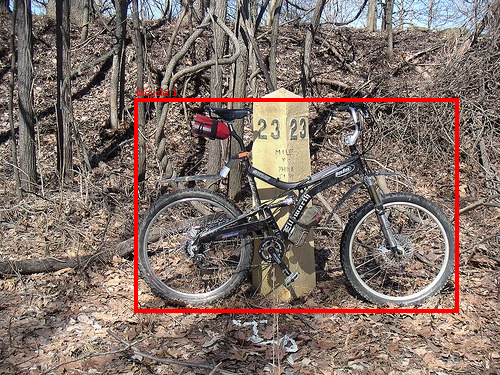

In [6]:
from pyspark.ml import PipelineModel
from sparkocr.enums import *
from sparkocr.transformers import *
from sparkocr.utils import display_images

bin_to_image = BinaryToImage() \
    .setOutputCol("image") \
    .setImageType(ImageType.TYPE_3BYTE_BGR)

draw = ImageDrawAnnotations() \
    .setInputCol("image") \
    .setInputChunksCol("annotation") \
    .setOutputCol("image_with_annotations") \
    .setFontSize(10) \
    .setLineWidth(4)\
    .setRectColor(Color.red)

pipeline_ann = PipelineModel(stages=[
    bin_to_image,
    draw
    ])

results_ann = pipeline_ann.transform(df).cache()
display_images(results_ann, "image_with_annotations")

In [ ]:
detector = ImageTableDetector()
detector.fit(df)